# Introduction

<!-- - Objective: Describe the purpose of the network analysis on the EU-27 flow of trade goods, including the significance and expected impact.
- Problem statement : Describe the specific problem or challenge the analysis aims to address within the EU-27 trade network. Explain why this problem is significant and merits investigation.
- Background: Provide a brief background on EU trade policies, historical trade flow patterns, and their importance for economic and political strategies.
- Scope of Analysis: Define the geographical and economic scope, including the specific goods or sectors analyzed.
 -->


In the current era of globalization, the European Union (EU) stands as a formidable example of economic integration and cooperation. Through the establishment of a single market among its 27 member states, the EU has facilitated the free flow of goods, services, capital, and labor, thereby fostering an environment of economic prosperity and stability. At the core of this integration is the seamless trade of goods across member states, underpinned by a complex customs union. This report delves into the intricate network of trade relationships within the EU-27, employing a network analysis approach to unravel patterns, trends, and insights that can significantly inform economic and political strategies.

#### Objective & Problem statement
The purpose of this network analysis is to scrutinize the flow of trade goods within the EU-27, aiming to unearth underlying patterns and trends that characterize intra-EU trade dynamics. By quantitatively and qualitatively analyzing the trade flows among member states, this report seeks to provide a comprehensive understanding of the economic interactions that drive the EU's single market. The insights gained are expected to inform policy-making, enhance economic strategies, and contribute to the overall resilience and efficiency of the EU's trade network.

The European Union (EU) has long been celebrated for its unprecedented level of economic integration, facilitating a single market where goods, services, capital, and people move as freely as within a single country. This integration is underpinned by a complex network of trade flows among the EU-27 member states, each contributing to and benefiting from the union's collective economic strength. However, beneath the surface of this seemingly cohesive economic bloc lie challenges that, if not addressed, could undermine the stability and prosperity the EU strives to ensure for its members. This analysis aims to shed light on such challenges, focusing specifically on the intricacies of the trade flow network within the EU-27.

The primary problem that this analysis seeks to address is the identification and understanding of vulnerabilities, dependencies, and inefficiencies within the EU-27 trade flow network. These issues can manifest in several ways, including, but not limited to, over-dependence from certain member states, trade imbalances that may exacerbate economic disparities, and vulnerabilities to external economic shocks. Such challenges are not only economic in nature but can also have profound political and social implications, influencing everything from regional development policies to EU-wide strategic decisions.

By doing so, this report aims to provide actionable insights that can inform policy decisions, enhance economic strategies, and ultimately contribute to a more robust and resilient EU economy. The overarching goal is to ensure that the EU-27 can navigate the complexities of global trade dynamics while maintaining its principles of solidarity and economic integration, thereby securing a prosperous future for all its member states.

#### Scope of Analysis
This analysis focuses on the geographical confines of the EU-27, encompassing all member states except for the United Kingdom, following its departure from the union. The economic scope of this study spans various sectors and goods, reflecting the multifaceted nature of intra-EU trade. The choice of sectors and goods for this analysis was guided by their significance to the EU's economy, the volume of trade they represent, and their impact on regional development and strategic economic policies. Here is a map of all the coutry we are going to analyze in this report.

![EU-27 map](https://upload.wikimedia.org/wikipedia/commons/d/dd/2020_EU_MAP.svg)


# Methodology

<!--
- Data Collection: Outline the sources of your data, including any limitations or biases in the data.
https://trade.ec.europa.eu/access-to-markets/en/statistics
- Network Analysis Tools and Techniques: Detail the tools and computational methods used for network analysis, including any software or algorithms.
- Analytical Framework: Describe how the network was modeled (e.g., nodes representing countries and edges representing trade flows) and the criteria for analysis (e.g., trade volume, trade balance).
 -->

This section outlines the comprehensive methodology employed to analyze the trade flow network within the European Union. Our approach integrates data collection, network analysis tools and techniques, and an analytical framework designed to model and interpret trade flows among the EU-27 member states. The methodology is structured to ensure robustness, accuracy, and relevance of the findings to inform policy and strategic decision-making.

#### Data Collection

The foundation of our analysis rests on data collected from the European Commission's Access2Markets portal [https://trade.ec.europa.eu/access-to-markets/en/statistics]. This portal provides extensive trade data, including the value and volume of imports and exports, categorized by goods and sectors across all EU-27 member states. Data collection focused on the most recent complete year available to ensure timeliness and relevance.

**Limitations and Biases:** The primary limitation of the data arises from its dependency on reported figures by member states, which may vary in precision and completeness. Additionally, the analysis is constrained by the availability of harmonized data across all goods and sectors, acknowledging potential biases towards more transparently reported categories.

*Issues with data importation : the data imported was not in csv but in human readable format in excel with several layer of column titles (so not extractable with code). There were also one file for each country, so we had to copy and paste the data from every single file manually and then to filter out redundancy with python. This took a lot of time and despite the fact that analyzing dynamic evolution over time would have been pertinent, we prefered to put efforts in analyzing deeply the data for one year instead of doing a lot of manual work and analyzing dynamicaly the network but less deeply.The last difficulty we had was to learn a new python library (NetworkX) which we never worked with before*

#### Network Analysis Tools and Techniques

**Software and Algorithms:** The network analysis was conducted using Python, leveraging libraries such as NetworkX for network construction and analysis, and matplotlib for visualization. These tools were chosen for their flexibility, robust computational capabilities, and extensive community support.


#### Network Construction
- **Building the Network:** The network was constructed with countries as nodes and their trade flows as directed edges. The edges were assigned weights based on the balance of trade value in euros (exports minus imports).

- **Edge Filtering:** Given that all members of the EU-27 engage in mutual trade, the initial network formed a fully connected graph. To facilitate a deeper analysis and enhance the graph's clarity, we applied a filter to remove edges representing trade flows below 1 billion euros. This step helped reveal significant trading communities among the members.

- **Visualization Attributes:** Nodes were colored in green and red, indicating positive and negative trade balances, respectively. Additionally, the size of each node was determined by the magnitude of its trade balance, with larger nodes signifying larger balances.


# Findings and Analysis

## Network creation (code)

In [ ]:
try:
    import infomap
except ImportError:
    !pip install infomap

try:
    import community as python_louvain # python-louvain is imported as community
except ImportError:
    !pip install python-louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.1/263.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for infomap: filename=infomap-2.7.1-cp310-cp310-linux_x86_64.whl size=7690302 sha256=93dcb4799e3c8a4730621f08fc5b00fc58f6be6f98561a4d112839eea1589a79
  Stored in directory: /root/.cache/pip/wheels/e4/01/53/fd7c62079098140cd582b999592b4592c0dad7300cac32b6e1
Successfully built infomap


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import drive
import community as community_louvain
import networkx as nx
import infomap
import numpy as np
from collections import defaultdict

drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
df_all = pd.read_excel('/content/drive/MyDrive/Msc/CNA/Data_All.xlsx')

{'France': -129351671484.0, 'Austria': -11674320759.0, 'Belgium': 34698094577.0, 'Bulgaria': -2409222974.0, 'Croatia': -13617129385.0, 'Cyprus': -5764219991.0, 'Czech Republic': 39818584071.0, 'Denmark': -2315419394.0, 'Estonia': -4751186345.0, 'Finland': -10925476045.0, 'Germany': -30759974723.0, 'Greece': -11740300043.0, 'Hungary': 14450847842.0, 'Ireland': 27990302937.0, 'Italy': -13080281626.0, 'Latvia': -7000631708.0, 'Lithuania': -7453513113.0, 'Luxembourg': -8130543131.0, 'Malta': -2807413567.0, 'Netherlands': 251160402234.0, 'Poland': 31028366811.0, 'Portugal': -24484979883.0, 'Romania': -19543782458.0, 'Slovakia': 763869030.0, 'Slovenia': 7287479894.0, 'Spain': 703780944.0, 'Sweden': -19265880487.0}


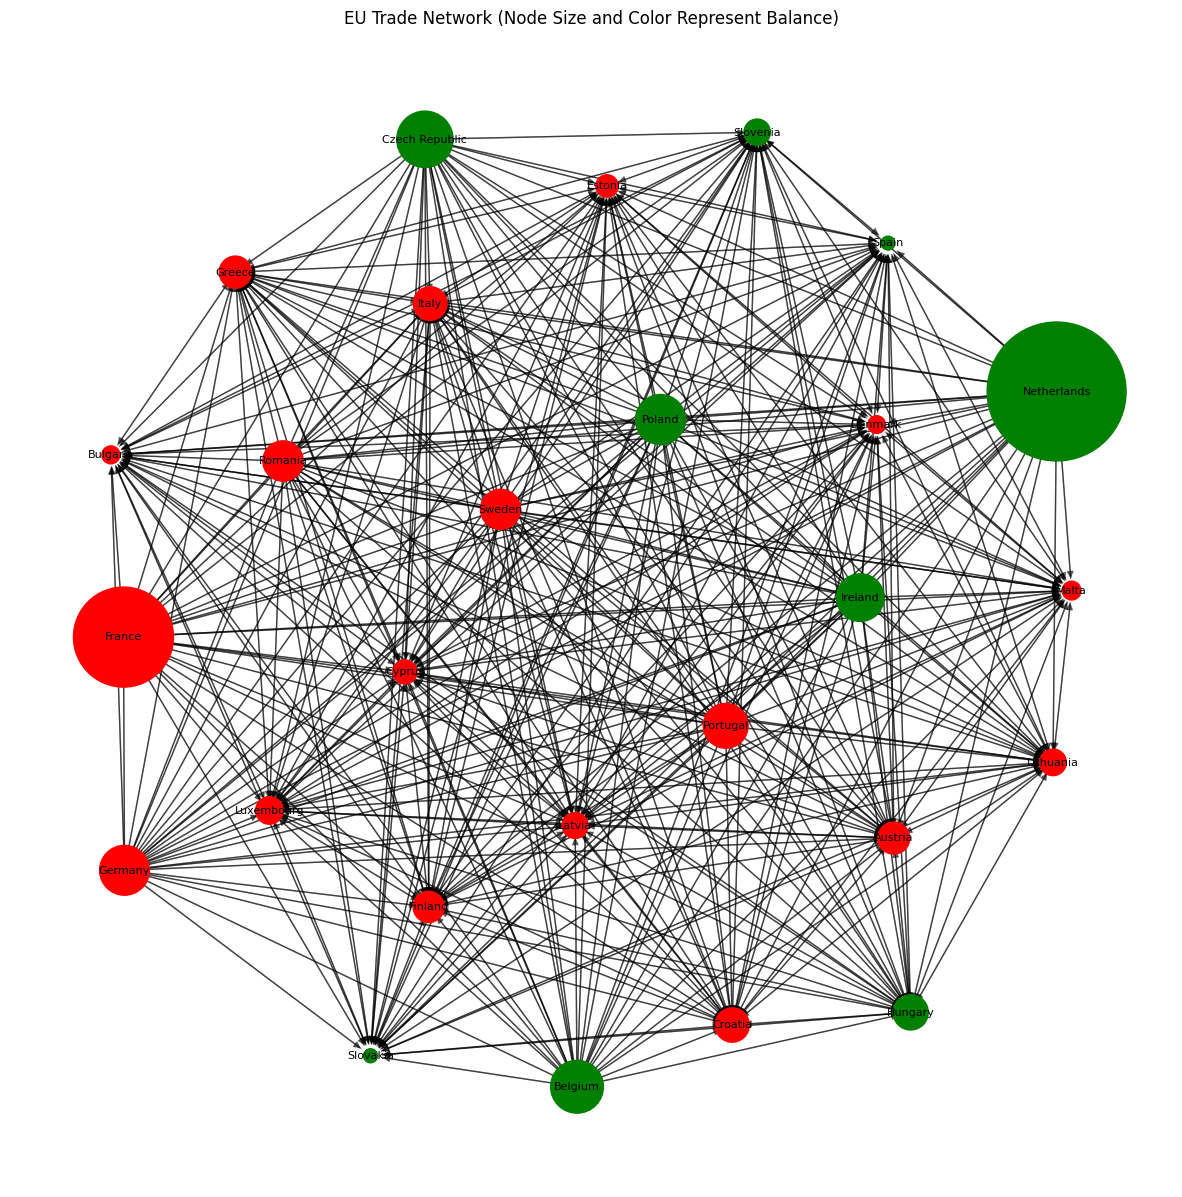

In [ ]:
trade_network_all = nx.DiGraph()

for index, row in df_all.iterrows():
    country = row['Country']
    partner = row['Partners']
    import_value = float(row['Import'].replace(',', '').replace(' ', ''))
    export_value = float(row['Export'].replace(',', '').replace(' ', ''))
    balance_value = export_value - import_value

    if country not in trade_network_all:
        trade_network_all.add_node(country)
    if partner not in trade_network_all:
        trade_network_all.add_node(partner)

    trade_network_all.add_edge(country, partner, import_value=import_value, export_value=export_value, balance_value=balance_value)

node_balance = {node: 0 for node in trade_network_all.nodes()}
for node in trade_network_all.nodes():
    for _, _, data in trade_network_all.edges(node, data=True):
        node_balance[node] += data['balance_value']

print(node_balance)

# Step 2: definition of colors based on the balance
node_color_map = ['green' if balance > 0 else 'red' for node, balance in node_balance.items()]

# Step 3: Calculation the absolute size of each node based on the absolute balance
node_size = {node: abs(balance) for node, balance in node_balance.items()}

# Normalization of the sizes for visualization purposes
min_size = 100  # Minimum size for the nodes
max_size = 10000  # Maximum size for the nodes
max_balance = max(node_size.values())  # Maximum absolute balance
min_balance = min(node_size.values())  # Minimum absolute balance

normalized_node_size = {
    node: min_size + (size - min_balance) / (max_balance - min_balance) * (max_size - min_size)
    for node, size in node_size.items()
}

# Step 4: Vizualisation
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(trade_network_all)
nx.draw_networkx_nodes(
    trade_network_all,
    pos,
    node_size=[normalized_node_size[node] for node in trade_network_all.nodes()],
    node_color=node_color_map
)
nx.draw_networkx_edges(trade_network_all, pos, width=1, alpha=0.5)
nx.draw_networkx_labels(trade_network_all, pos, font_size=8)
plt.title('EU Trade Network (Node Size and Color Represent Balance)')
plt.axis('off')
plt.show()

In [ ]:

balance_threshold = 1000000000

trade_network_filtered = nx.DiGraph()

for node in trade_network_all.nodes():
    trade_network_filtered.add_node(node)

for edge in trade_network_all.edges(data=True):
    if abs(edge[2]['balance_value']) >= balance_threshold:
        trade_network_filtered.add_edge(edge[0], edge[1], **edge[2])

num_edges_original = trade_network_all.number_of_edges()
num_edges_filtered = trade_network_filtered.number_of_edges()

percentage_links_removed = (1 - num_edges_filtered / num_edges_original) * 100

print(percentage_links_removed)


72.79202279202279


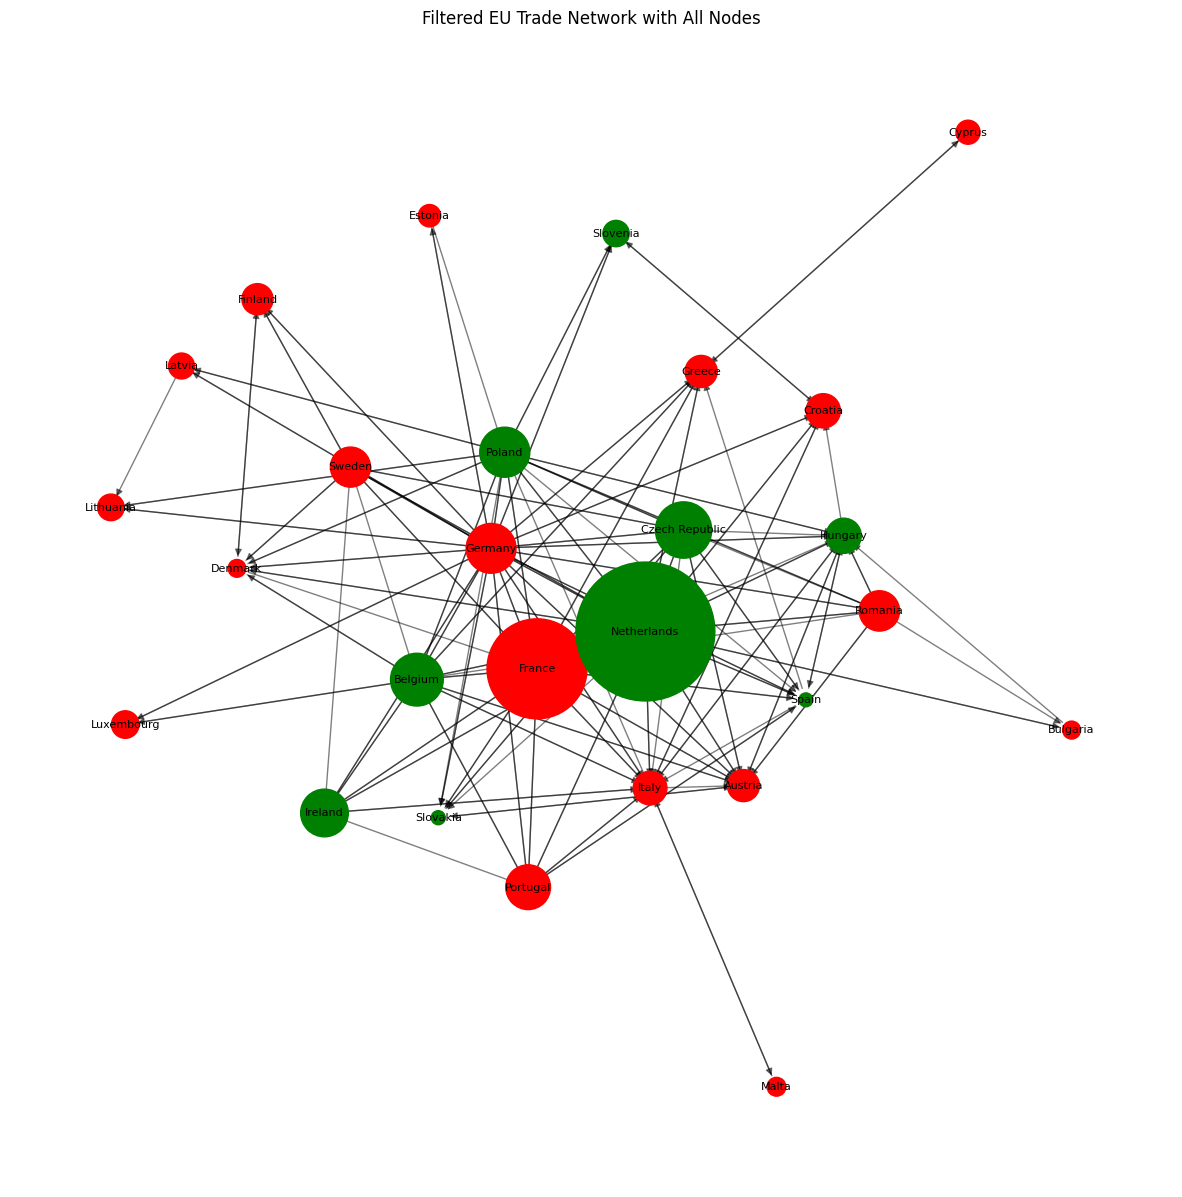

In [ ]:

plt.figure(figsize=(15, 15))
pos = nx.kamada_kawai_layout(trade_network_filtered)

nx.draw_networkx_nodes(
    trade_network_filtered,
    pos,
    node_size=[normalized_node_size[node] for node in trade_network_filtered.nodes()],
    node_color=node_color_map
)
nx.draw_networkx_edges(trade_network_filtered, pos, width=1, alpha=0.5)
nx.draw_networkx_labels(trade_network_filtered, pos, font_size=8)
plt.title('Filtered EU Trade Network with All Nodes')
plt.axis('off')
plt.show()

In [ ]:
# Country with the biggest positive balance
biggest_positive_balance_country = max(node_balance, key=lambda k: node_balance[k] if node_balance[k] > 0 else -float('inf'))
biggest_positive_balance = node_balance[biggest_positive_balance_country]

# Country with the biggest negative balance
biggest_negative_balance_country = min(node_balance, key=lambda k: node_balance[k] if node_balance[k] < 0 else float('inf'))
biggest_negative_balance = node_balance[biggest_negative_balance_country]

# Country with the smallest absolute balance
smallest_absolute_balance_country = min(node_balance, key=lambda k: abs(node_balance[k]))
smallest_absolute_balance = node_balance[smallest_absolute_balance_country]

print(f"Country with the biggest positive balance: {biggest_positive_balance_country} ({biggest_positive_balance})")
print(f"Country with the biggest negative balance: {biggest_negative_balance_country} ({biggest_negative_balance})")
print(f"Country with the smallest absolute balance: {smallest_absolute_balance_country} ({smallest_absolute_balance})")


Country with the biggest positive balance: Netherlands (251160402234.0)
Country with the biggest negative balance: France (-129351671484.0)
Country with the smallest absolute balance: Spain (703780944.0)


## Network Structure- global descriptors

The structural analysis of the European Union's (EU-27) trade of goods network provides critical insights into the integration and efficiency of trade relations among member states. Employing global network descriptors, this section delineates the overall architecture of intra-EU trade, emphasizing its implications for economic policy and strategy within the European Union.

### Overview of Network Metrics

- **Number of Nodes:** The network comprises 27 nodes, each representing a member state of the EU-27, highlighting the comprehensive scope of our analysis across the entire European Union.
- **Number of Edges:** With 191 edges, where each edge signifies a trade balance exceeding 1 billion euros, the network underscores the substantial volume of trade interactions among member states, reflecting a highly interconnected trade landscape.
- **Average Degree:** The average degree of 14.148 indicates that, on average, each country is directly engaged in trade relationships with approximately 14 other member states. This degree of connectivity showcases the dense fabric of intra-EU trade relations.
- **Density:** The network's density of 0.272 suggests that approximately 27% of all possible trading links are actively utilized. This density level denotes a robust yet not fully saturated trade network, indicating room for further integration or diversification of trade relations.
- **Clustering Coefficient:** A high clustering coefficient of 0.677 reflects a strong tendency among EU member states to form closely-knit trade clusters. This implies that countries engaging in trade with a common partner are likely to trade among themselves, fostering a cohesive trade environment.
- **Graph Diameter:** The diameter of 4 reveals the maximum distance between the most distantly connected pair of countries in the network. This small diameter indicates that any member state can be reached from any other through a maximum of four trade connections, exemplifying the EU's closely connected trade landscape.
- **Wiener Index:** With a value of 1297, the Wiener Index, which sums the shortest paths between all pairs of nodes, underscores the network's efficiency in facilitating trade flows across the EU-27.
- **Average Distance:** The average distance of 1.848 between any two countries in the network signifies the close and efficient nature of trade relationships, with most countries being directly or indirectly connected through one or two intermediary trade partners.
- **Kirchhoff Index:** The Kirchhoff Index of 7.004 reflects the network's resilience and the ease with which trade can be rerouted through alternative paths, enhancing the EU's capability to maintain trade flows even in the face of disruptions.
- **Random Walk Index:** A Random Walk Index of 0.143 indicates a high degree of connectivity and accessibility within the trade network, allowing for efficient distribution and movement of goods across member states.

### Implications for the European Union

The analysis of global descriptors reveals a highly integrated and efficient trade network within the EU-27, characterized by dense connections, cohesive trade clusters, and a compact structure facilitating efficient trade flows. The network's robustness and resilience are crucial for maintaining economic stability and responding to external shocks or policy changes.

However, the room for further integration, as suggested by the network's density, points towards potential opportunities for enhancing trade relations, particularly with less directly connected member states. The high clustering coefficient, while indicating strong regional clusters, may also suggest the existence of trade cliques, which could lead to uneven benefits from the single market. Addressing these disparities requires targeted policies to ensure equitable trade benefits across all member states.

Furthermore, the network's efficiency and resilience, as evidenced by the Wiener and Kirchhoff indices, provide a strong foundation for the EU to navigate global economic challenges. Policymakers should leverage this network structure to bolster the EU's economic sovereignty, diversify trade relations, and enhance the resilience of the single market.

In conclusion, the global descriptors of the EU-27 trade network not only underscore the strengths of the EU's internal trade architecture but also highlight areas for strategic development. Enhancing connectivity, fostering equitable trade benefits, and leveraging the network's resilience are imperative for reinforcing the EU's economic integration and strategic positioning on the global stage.

### Code

In [ ]:
G = trade_network_filtered

# Number of nodes & edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Average degree
average_degree = np.mean([degree for node, degree in G.degree()])

# Density
density = nx.density(G)

# Clustering coefficient
clustering_coefficient = nx.average_clustering(G)

# Graph diameter and Average distance (require the graph to be undirected and connected)
if nx.is_connected(G.to_undirected()):
    # Graph diameter
    diameter = nx.diameter(G)

    # Average distance
    average_distance = nx.average_shortest_path_length(G)

    # Wiener Index - Adjusted calculation
    wiener_index = sum(sum(length for _, length in nx.shortest_path_length(G, source=node).items()) for node in G.nodes())
else:
    diameter = 'Graph not connected'
    average_distance = 'Graph not connected'
    wiener_index = 'Graph not connected'


G_undirected = G.to_undirected()

# Kirchhoff index requires the Laplacian matrix of the graph
L = nx.laplacian_matrix(G_undirected).toarray()
eigenvalues = np.linalg.eigvals(L)
kirchhoff_index = sum(1 / val for val in eigenvalues if val > 1e-10)  # avoid division by zero

# Random Walk index is the inverse of the Kirchhoff index
random_walk_index = 1 / kirchhoff_index if kirchhoff_index else 'Undefined'


print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")
print(f"Average Degree: {average_degree}")
print(f"Density: {density}")
print(f"Clustering Coefficient: {clustering_coefficient}")
print(f"Graph Diameter: {diameter}")
print(f"Wiener Index: {wiener_index}")
print(f"Average Distance: {average_distance}")
print(f"Kirchhoff Index: {kirchhoff_index}")
print(f"Random Walk Index: {random_walk_index}")


Number of Nodes: 27
Number of Edges: 191
Average Degree: 14.148148148148149
Density: 0.2720797720797721
Clustering Coefficient: 0.6774739627599194
Graph Diameter: 4
Wiener Index: 1297
Average Distance: 1.8475783475783476
Kirchhoff Index: 7.0039508346014925
Random Walk Index: 0.142776559061454


## Community Detection Analysis
<!-- Describe any sub-communities within the trade network, such as groups of countries with similar trade profiles or clustered trade goods. -->

In our pursuit to understand the complex trade relationships within the EU-27 network, community detection algorithms serve as essential tools. These algorithms aim to identify clusters or 'communities' within networks, where nodes (in our case, EU member states) are more densely connected to each other than to nodes outside their community. This analysis is crucial for revealing underlying structures that may inform policy development, economic strategy, and integration efforts.

### The Infomap Algorithm

The Infomap algorithm is a sophisticated method designed to detect communities by minimizing the expected description length of a random walker's movements on a network. In simpler terms, it seeks to uncover how information flows within the network, grouping together nodes that share more frequent interactions. The algorithm's effectiveness lies in its ability to identify natural divisions within the network, based on the principle that movements (or trade flows, in our context) are more common within communities than between them.

#### Challenges Encountered with Infomap

Despite its theoretical strengths, the application of the Infomap algorithm to the EU-27 trade network faced significant challenges. Initially, the algorithm tended to produce results that were either too fragmented, with a large number of communities consisting of a single member state, or too consolidated, yielding one vast community encompassing nearly all member states with one or two outliers forming a smaller community. Efforts to fine-tune the algorithm resulted in slightly improved, yet still unsatisfactory, outcomes: one moderately sized community of seven member states and a few pairs, but these configurations lacked coherent economic or geographical rationale.

#### Analysis of the Algorithm's Performance

Several factors may contribute to the Infomap algorithm's challenges in effectively partitioning the EU-27 trade network. First, the inherent complexity and high interconnectivity of trade relationships within the EU may blur the distinctions between communities. The algorithm's reliance on information flow patterns could be less effective in a network where trade volumes are relatively balanced and widespread across many member states, making it difficult to identify clear boundaries.

Moreover, the trade network's design — with nodes representing countries and edges weighted by trade balance exceeding one billion euros — might not exhibit the type of flow patterns the Infomap algorithm is optimized to detect. This discrepancy suggests that while the algorithm excels in networks with distinct flow hierarchies or directional patterns, the EU-27's balanced and multidirectional trade flows present a challenging scenario for Infomap.

Lastly, the economic and political integration within the EU, promoting uniform trade policies and reducing barriers, may inherently reduce the visibility of distinct communities that the algorithm seeks to identify. Such integration could lead to a more homogenized network appearance, challenging the algorithm's capacity to delineate separate communities based on trade flow alone.

### The Louvain Method

Following the challenges faced with the Infomap algorithm, we employed the Louvain method to discern the community structure within the EU-27 trade network. This approach is crucial for informing policy and understanding economic alliances within the European Union.

#### Understanding the Louvain Method

The Louvain method is a widely-used, heuristic-based algorithm that optimizes modularity within a network. It works by iteratively grouping nodes together into communities, aiming to maximize the density of links within communities compared to links between communities. In the context of the EU-27 trade network, the algorithm assesses the strength of trade relationships to group countries that share more substantial trade volumes, creating clusters that reflect significant trade partnerships.

#### Differentiation from Infomap and Improved Results

Unlike the Infomap algorithm, which bases community detection on information flow and can produce fragmented results in highly interconnected networks, the Louvain method focuses on the strength of connections, making it better suited for the EU-27 network where trade strengths are unequally distributed. The Louvain method's reliance on modularity optimization proved to be more effective for our network, resulting in more economically coherent communities.

#### Describing the Communities in a European Context

**Community 1:** This community encompasses a diverse group of countries, including France, Austria, Bulgaria, Croatia, the Czech Republic, Hungary, the Netherlands, Romania, and Slovakia. These states represent a mix of Western and Eastern EU countries, suggesting a balanced and possibly mutually beneficial trade dynamic that bridges the east-west divide within the Union. This is possibly a beneficial alliance between stronger economy like France or Netherlands that profits of the cheaper labor of the eastern countries.

**Community 2:** Comprising Belgium, Ireland, Italy, Luxembourg, Malta, and Portugal, this community suggests a pattern where smaller economies (Luxembourg and Malta), as well as peripheral countries (Ireland and Portugal), are significantly connected to larger economies like Italy and central hubs like Belgium. This community may reflect specialized trade agreements or shared economic interests such as finance, pharmaceuticals, and Mediterranean products.

**Community 3:** This community, including Estonia, Germany, Latvia, Lithuania, Poland, and Slovenia, is notable for containing Germany — Europe's largest economy. The presence of Germany alongside these other nations indicates strong trade ties that likely play a significant role in the economic health of the region, potentially driven by Germany's central role in manufacturing and exports, which here also, takes benefits from a cheaper north-eastern.

**Community 4:** Cyprus, Greece, and Spain form a community that may be shaped by similarities in economic structure, such as reliance on sectors like tourism and agriculture, or by geographical proximity and shared trade policies within the Mediterranean region.

**Community 5:** The Scandinavian countries — Denmark, Finland, and Sweden — constitute a community which likely reflects a common trade policy framework and socio-economic model, as well as historical trade ties and shared cultural and geographical characteristics.

### Implications for the EU
### Conclusion and Implications for the European Union

The application of the Louvain method to the EU-27 trade network has facilitated a nuanced understanding of the community structures within the network. The analysis reveals that the European Union's internal trade is characterized by distinct clusters of member states, which may be underpinned by shared economic interests, geographical proximities, or specific sectoral interdependencies.

#### Implications for EU Policy and Integration

The detected communities offer insights into the natural trade affiliations among member states, which the EU might consider in the development of tailored economic policies:

- **Policy Tailoring:** The European Commission can tailor policies to further foster intra-community trade strengths while also encouraging inter-community trade, balancing economic cohesiveness with expansion.
  
- **Regional Development:** The distinct communities identified by the Louvain method could be indicative of regions that may benefit from targeted economic development initiatives, leveraging their existing strong trade ties.

- **Economic Cohesion:** The clustering of countries suggests potential for enhanced economic cohesion. For example, the Mediterranean cluster may benefit from integrated policies that support tourism and agriculture, while the Scandinavian cluster might focus on innovation and sustainability.

- **Diversification Strategies:** The presence of Germany in a community with several Baltic states and Poland may indicate a heavy reliance on German trade. The EU could support these countries in diversifying their trade relations to reduce dependency and increase economic resilience.

- **Crisis Response:** The network analysis provides an understanding of how a crisis in one member state could affect others within its community. The EU can use this information to develop robust crisis response mechanisms that consider these interdependencies.

- **Enhancing Connectivity:** The analysis might indicate the need to enhance connectivity between certain communities, helping to ensure that the benefits of the single market are felt more uniformly across the EU.

- **Strategic Alliances:** Understanding the natural groupings within the trade network can assist in forming strategic alliances for negotiating international trade agreements and for positioning the EU more strongly on the global stage.

The community detection exercise underscores the intricate nature of trade relationships within the EU-27. Recognizing the structure of these relationships is crucial for the European Union as it seeks to navigate a rapidly changing global economy while ensuring economic prosperity and stability for its member states. The insights gleaned from the Louvain method provide a data-driven foundation for strategic policy-making and regional development, ultimately contributing to a more integrated, resilient, and prosperous European Union.

### Code

#### Infomap

In [ ]:
# Markov Time: 0.9900000000000004, Communities: 2, Members in Communities: {1: 12, 2: 2}
# Markov Time: 0.0.5690000000000001, Communities: 11, Members in Communities: {1: 9, 2: 2, 3: 2, 4: 2, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1}
def apply_infomap(G, markov_time=0.5700000007):
    try:
        im = infomap.Infomap(f"--directed --num-trials 100 --markov-time {markov_time}")
        node_id_mapping = {node: i for i, node in enumerate(G.nodes())}
        for u, v, data in G.edges(data=True):
            weight = data.get('balance_value', 1.0)
            im.addLink(node_id_mapping[u], node_id_mapping[v], weight)

        im.run()

        communities = {}
        for node in im.tree:
            if node.isLeaf():
                original_node_id = list(node_id_mapping.keys())[list(node_id_mapping.values()).index(node.index)]
                communities[original_node_id] = node.moduleIndex()

        # Filter out communities with less than 2 members
        community_sizes = defaultdict(int)
        for community in communities.values():
            community_sizes[community] += 1

        communities = {node: community for node, community in communities.items() if community_sizes[community] > 1}

        if not communities:
            print(f"No communities found with markov_time={markov_time}.")
        return communities

    except Exception as e:
        print(f"An error occurred with markov_time={markov_time}: {e}")
        return {}

# Apply Infomap on the graph
infomap_communities = apply_infomap(G)

# results
communities_by_module = defaultdict(list)
for node, module in infomap_communities.items():
    communities_by_module[module].append(node)

for module, nodes in communities_by_module.items():
    print(f"Community {module}: {nodes}")


Community 1: ['Belgium', 'Austria', 'France', 'Czech Republic', 'Latvia', 'Cyprus', 'Denmark']
Community 2: ['Bulgaria', 'Croatia']
Community 3: ['Lithuania', 'Luxembourg']
Community 4: ['Greece', 'Germany']
Community 5: ['Italy', 'Ireland']


Community 1: ['Belgium', 'Austria', 'France', 'Czech Republic', 'Latvia', 'Cyprus', 'Denmark']
Community 2: ['Bulgaria', 'Croatia']
Community 3: ['Lithuania', 'Luxembourg']
Community 4: ['Greece', 'Germany']
Community 5: ['Italy', 'Ireland']
{1: 7, 2: 2, 3: 2, 4: 2, 5: 2}


<ipython-input-12-528fd1579fa1>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('viridis', n_colors)
/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


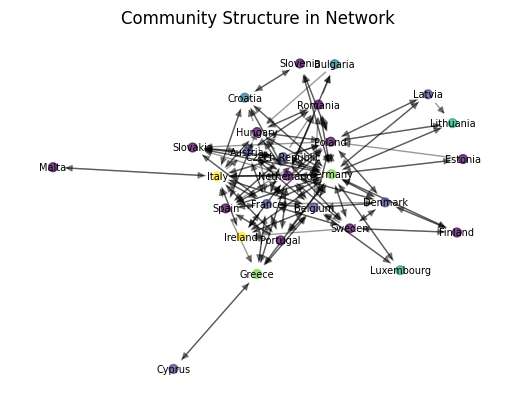

In [ ]:
import matplotlib.cm as cm
communities_by_module = defaultdict(list)
for node, module in infomap_communities.items():
    communities_by_module[module].append(node)

for module, nodes in communities_by_module.items():
    print(f"Community {module}: {nodes}")


community_sizes = {module: len(nodes) for module, nodes in communities_by_module.items()}
print(community_sizes)

import matplotlib.pyplot as plt
import networkx as nx

pos = nx.spring_layout(G)

# Generate a color map, one color per community
unique_communities = set(infomap_communities.values())
default_community = max(unique_communities) + 1
n_colors = len(unique_communities) + 1
color_map = cm.get_cmap('viridis', n_colors)
colors = [color_map(infomap_communities.get(node, default_community) % n_colors) for node in G.nodes()]

nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_nodes(G, pos, node_size=40, cmap=plt.cm.jet, node_color=colors, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=7, font_family='sans-serif')

plt.title('Community Structure in Network')
plt.axis('off')
plt.show()


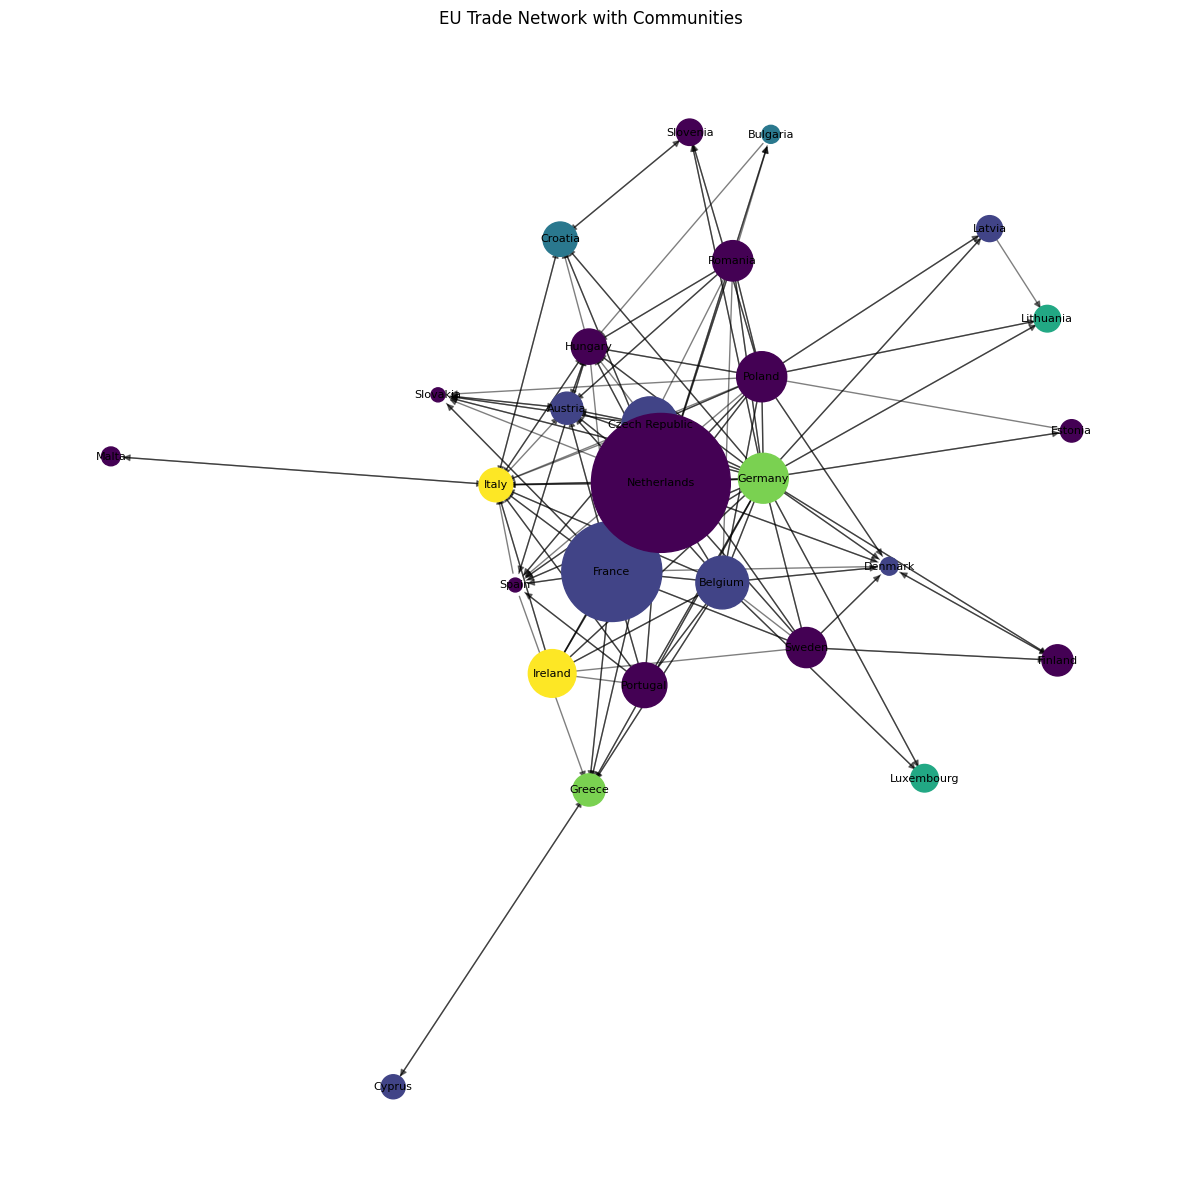

In [ ]:

base_pos = pos
base_normalized_node_size = normalized_node_size
unique_communities = set(infomap_communities.values())
default_community = max(unique_communities) + 1
new_colormap = plt.cm.viridis

community_colors = new_colormap(np.linspace(0, 1, len(unique_communities) + 1))
community_color_map = []
for node in G.nodes():
    community_index = infomap_communities.get(node, default_community)
    color = community_colors[community_index % len(community_colors)]
    community_color_map.append(color)

plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(
    G,
    base_pos,
    node_size=[base_normalized_node_size[node] for node in G.nodes()],
    node_color=community_color_map
)
nx.draw_networkx_edges(G, base_pos, width=1, alpha=0.5)
nx.draw_networkx_labels(G, base_pos, font_size=8)
plt.title('EU Trade Network with Communities')
plt.axis('off')
plt.show()


#### Louvain method

In [ ]:
try:
    import community
    import community.community_louvain as community_louvain
except ImportError:
    print("Please install the 'community' module with: pip install python-louvain")

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G_undirected = G.to_undirected()

try:
    partition = community_louvain.best_partition(G_undirected)

    for i, com in enumerate(set(partition.values()), start=1):
        members = [nodes for nodes in partition.keys() if partition[nodes] == com]
        print(f"Community {i}: {', '.join(members)}")

    # Visualization enhancements
    size = float(len(set(partition.values())))
    pos = nx.spring_layout(G_undirected)
    colors = plt.cm.jet(np.linspace(0, 1, int(size)))

    for com, color in zip(set(partition.values()), colors):
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
        nx.draw_networkx_nodes(G_undirected, pos, list_nodes, node_size=100,
                               node_color=[color], label=f"Community {com+1}")

    nx.draw_networkx_edges(G_undirected, pos, alpha=0.5)
    nx.draw_networkx_labels(G_undirected, pos)
    plt.axis('off')
    plt.legend(scatterpoints=1)
    plt.show()
except AttributeError as e:
    print(f"An error occurred: {e}")
    print("Ensure the 'community' library is correctly installed and imported.")


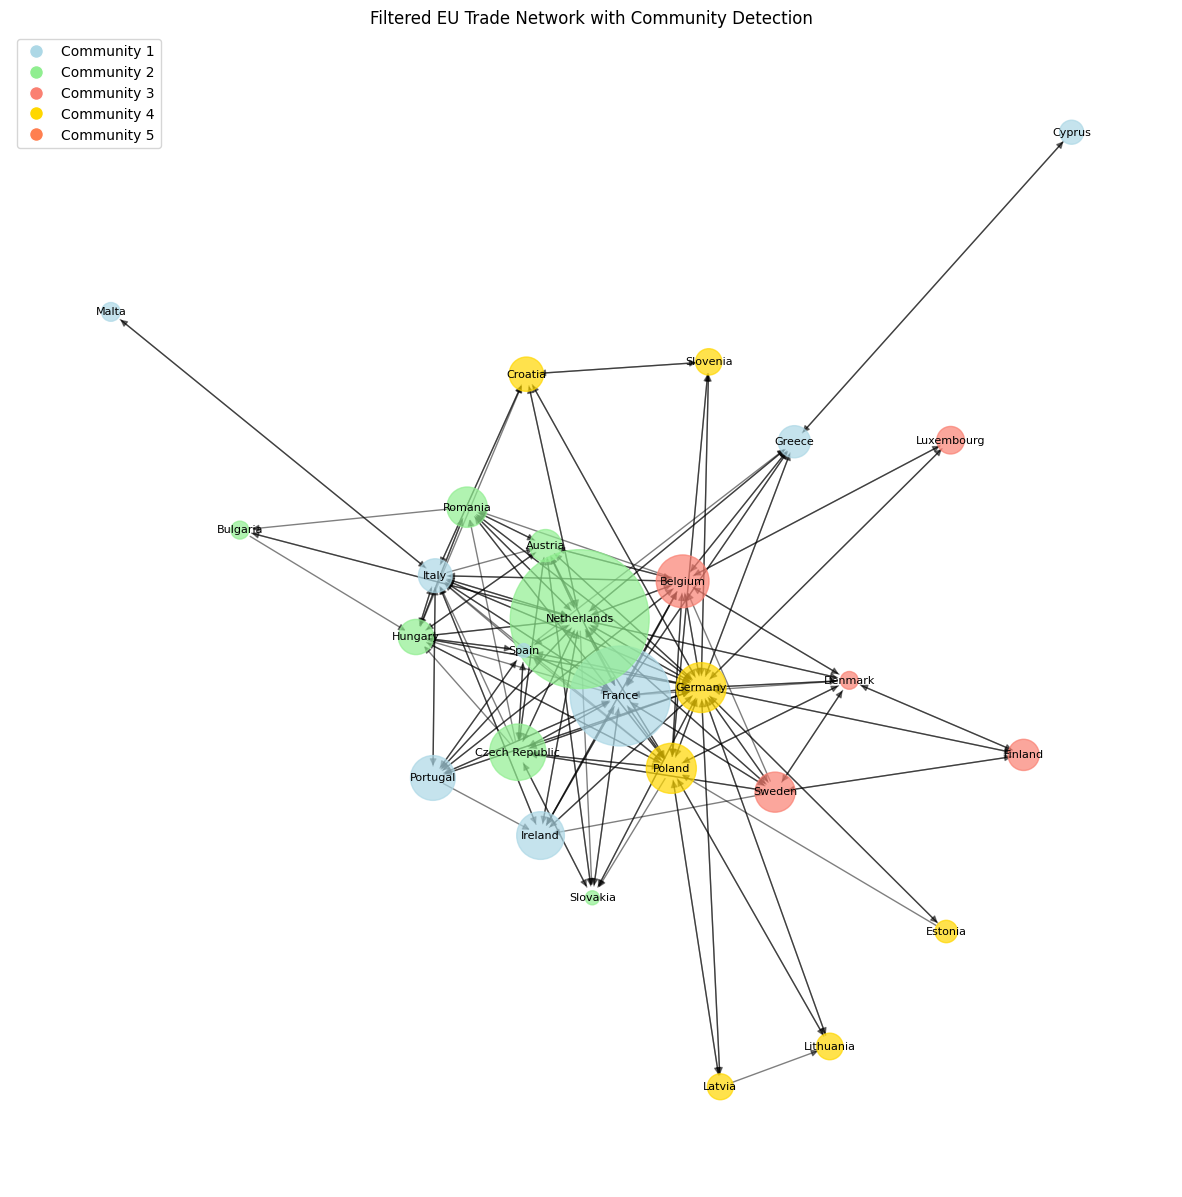

In [ ]:
community_color_map = {
    0: 'lightblue',   # Community 1
    1: 'lightgreen',  # Community 2
    2: 'salmon',      # Community 3
    3: 'gold',         # Community 4
    4: 'coral' # community 5
}

# Map each node to the color of its community
node_community_color = [community_color_map[partition[node]] for node in trade_network_filtered.nodes()]

plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(
    trade_network_filtered,
    pos,
    node_size=[normalized_node_size[node] for node in trade_network_filtered.nodes()],
    node_color=node_community_color,
    alpha=0.7
)
nx.draw_networkx_edges(trade_network_filtered, pos, width=1, alpha=0.5)
nx.draw_networkx_labels(trade_network_filtered, pos, font_size=8)

community_patches = [plt.Line2D([0], [0], marker='o', color='w', label=f'Community {com+1}',
                                 markersize=10, markerfacecolor=color) for com, color in community_color_map.items()]
plt.legend(handles=community_patches)

plt.title('Filtered EU Trade Network with Community Detection')
plt.axis('off')
plt.show()


## Trade Flow Analysis - Local descriptors
<!-- - Detail the analysis of trade flows, including the identification of major exporters and importers, key trade relationships, and trade balance issues.
- **Problematic Areas Identified**: Discuss any problems or challenges discovered during the analysis, such as vulnerabilities, dependencies, or inefficiencies within the network.
Country with the biggest positive balance: Netherlands (251160402234.0)
Country with the biggest negative balance: France (-129351671484.0)
Country with the smallest absolute balance: Spain (703780944.0) -->

As we turn to the micro-level intricacies of the EU-27 trade network, a detailed examination of local descriptors reveals the individual economic footprint of each member state within the union's complex trade landscape. By focusing on countries that stand out due to their trade balances, we gain valuable insights into the diverse roles that member states play in the economic tapestry of the EU. In this segment, we will concentrate our analysis on three particularly interesting members: the Netherlands, with the largest positive trade balance, demonstrating its role as a central trade hub; France, which presents the largest negative trade balance, reflecting its current economic challenges within the network; and Spain, showcasing the smallest absolute trade balance, indicating a finely tuned equilibrium between its imports and exports. This analysis not only highlights the individual contributions and challenges of these countries but also sheds light on the broader economic health and strategic positions within the EU's internal market.

*Issues : We had some difficulties to compute Katz and Eigenvector centrality which would have been insightful in this analysis. Despite trying several values for the different parameters, we couldn't achieve convergence so we just decided to not use them as we had already enough local descriptors to perform a pertinent analysis with those we already had*

### Local Descriptor Analysis: France

Within the vast network of EU-27 trade, France occupies a distinctive position, marked by its extensive trade linkages and significant role in the network's connectivity. The local descriptor analysis provides a deep dive into France's trade dynamics, shedding light on areas of strength and opportunities for improvement within the single market.

- **Degree:** France's high degree of 14 indicates its extensive trade connections with other EU member states, underscoring its integral role in intra-community trade. France exhibits a balanced trade engagement, reflecting its economic influence and active participation in the exchange of goods.

- **Eccentricity:** An eccentricity score of 2 suggests that France is closely connected to all other nodes in the network. This proximity enables France to efficiently engage in trade activities across the union, bolstering its status as a central player within the European trade landscape.

- **Closeness Centrality:** The closeness centrality of 0.703 highlights France's short average distance to all other member states, reaffirming its accessibility and swift trade relations within the EU. This proximity to other countries in the trade network facilitates rapid and efficient exchange of goods, contributing to the economic agility of the union.

- **Betweenness Centrality:** A betweenness centrality of 0.877 places France as a critical intermediary in the network, often acting as a conduit through which trade flows between other member states. This indicates France's pivotal role in enabling and facilitating trade, potentially giving it significant control over the distribution of goods throughout the EU.

- **Clustering Coefficient:** With a clustering coefficient of 0.571, there is a strong propensity for France's direct trade partners to trade among themselves. This clustering may imply robust regional sub-networks where France plays a central role, possibly driven by shared economic, cultural, or geographic factors.

- **Strength & balance :** Despite the overall strength of France's trade relationships, quantified as 21,924,310,504, the country faces the challenge of a substantial negative trade balance of -129,351,671,484. This discrepancy between imports and exports is the largest negative balance within the EU-27 network and indicates an area of economic concern that may require strategic policy interventions.

#### Implications for the European Commission

The local descriptor analysis for France points to a country that is both central to the EU's trade network and facing a significant trade deficit. In light of these findings, the European Commission might consider policies that support France in enhancing export capabilities, reducing dependency on imports, or both. Strategies could include promoting sectors where France holds a competitive advantage, fostering innovation and value-added goods, and improving trade terms within the EU and with external partners. Addressing the trade imbalance is not only vital for France's economy but also for the overall economic health and stability of the European Union.

### Local Descriptor Analysis: Spain

Spain's role within the EU-27 trade network is characterized by its moderate level of connectivity and a near-equilibrium in trade balance. The analysis of Spain's local descriptors reveals a country that effectively bridges its imports and exports, maintaining a delicate balance that has implications for both its own economy and the wider EU market.

- **Degree:** Spain shows a degree of 8, representing its total direct trade connections. Spain maintains a slightly export-oriented trade profile within the EU-27 network, indicative of a country that provides more goods to other member states than it receives.

- **Eccentricity:** An eccentricity score of 2 for Spain signifies close and direct access to the rest of the network, enabling the country to engage in efficient trade exchanges with minimal intermediary steps, which is crucial for economic agility and competitiveness.

- **Closeness Centrality:** With a closeness centrality of 0.553, Spain is moderately positioned in terms of the average shortest path to all other nodes. While not as central as some of its EU counterparts, Spain still benefits from a degree of centrality that facilitates its participation in the internal market.

- **Betweenness Centrality:** Spain's betweenness centrality of 0.137 is relatively low, indicating that it is less frequently a broker or connector for trade flows between other countries. This suggests that Spain’s role in the EU trade network may be more of a terminal market than a redistributor of goods.

- **Clustering Coefficient:** A high clustering coefficient of 0.778 implies that Spain’s trade partners are highly interconnected amongst themselves, potentially creating strong trade clusters. This could reflect Spain's participation in tightly-knit regional trade agreements or shared sectors.

- **Strength & balance :** The trade strength of 8,038,814,991 for Spain suggests a healthy volume of trade, yet it is the smallest absolute trade balance among the EU-27 member states, standing at 703,780,944. This small absolute balance indicates a strong parity between Spain's import and export activities, reflecting a resilient and self-sustaining trade ecosystem.

#### Implications for the European Commission

Spain's local trade descriptors suggest a country that has managed to achieve a commendable balance in its trade affairs. However, the moderate centrality scores and the fine margin within its trade balance indicate potential areas for development. The European Commission could explore ways to further enhance Spain's export capacity and foster growth in sectors that contribute positively to its trade balance. Additionally, considering Spain's role within its highly interconnected trade clusters, policies that promote diversification and innovation in trade could serve to bolster Spain's economic resilience and its value within the EU’s internal market. Recognizing Spain's unique position and fostering its strengths could contribute to the overarching goal of economic stability and prosperity throughout the European Union.

### Local Descriptor Analysis: The Netherlands

The Netherlands stands out in the EU-27 trade network as a pivotal node with the largest positive trade balance, revealing its strategic role as a leading trade hub. A detailed analysis of the local descriptors for the Netherlands provides a quantitative perspective on its significant influence and robust engagement in EU trade activities.

- **Degree:** With the highest degree of 18 among EU member states, the Netherlands shows an exceptional level of connectivity within the network, highlighting its extensive direct trade linkages with a large number of countries.

- **Eccentricity:** An eccentricity value of 2 underscores the Netherlands' position as one of the most accessible countries within the EU trade network, facilitating its role as a central node through which trade goods efficiently pass.

- **Closeness Centrality:** Reflecting its significant placement within the network, the Netherlands' closeness centrality of 0.743 indicates that it is, on average, closer to all other member states than most. This metric is indicative of the country's strategic geographic and economic position in the EU trade network.

- **Betweenness Centrality:** The high betweenness centrality score of 0.952 is the most notable of the Dutch descriptors, confirming the Netherlands' role as an indispensable conduit and broker for trade flows across the EU. This underscores the importance of the Netherlands in connecting disparate regions and markets within the union.

- **Clustering Coefficient:** A clustering coefficient of 0.464, while lower than some of its EU peers, suggests that the Netherlands' trade partners are less interconnected amongst themselves compared to its own direct trade connections. This may indicate a tendency for the Netherlands to serve as a primary trade partner to a diverse array of countries which do not necessarily trade as heavily with each other.

- **Strength & balance :** The overall trade strength of 42,552,500,418 demonstrates the substantial volume of trade that the Netherlands handles within the EU. Combined with the largest positive trade balance of 251,160,402,234 euros, these figures highlight the Netherlands' economic vitality and its central role in the EU's trade network.

#### Implications for the European Commission

The Netherlands' dominant trade position carries significant implications for EU economic strategy and policy. Given its central role, it is essential for the European Commission to ensure that the Netherlands maintains its robust infrastructure and logistical capabilities to continue facilitating trade flows effectively. Moreover, policies that support the Netherlands in sustaining and expanding its trade relationships can have a positive ripple effect throughout the entire EU trade network.

Given its high betweenness centrality, any disruptions to the Netherlands' trade activities could have widespread implications for the EU. Therefore, it is imperative to consider policies that enhance the resilience of the Netherlands' trade networks against global economic fluctuations and localized challenges.

Lastly, the Commission might explore ways to leverage the Netherlands' trade influence to promote broader economic goals, such as sustainable trade practices, digital innovation in trade logistics, and the strengthening of trade ties with other economic blocs. Recognizing the Netherlands' strategic position and its contributions to the EU's trade landscape will be crucial for the continuous growth and integration of the European Union's internal market.

### Code

In [ ]:
import networkx as nx
import math

max_iter = 10000
alpha_katz = 0.003
tol = 1e-3
countries_of_interest = ['France', 'Netherlands', 'Spain']

measures = {}
for country in countries_of_interest:
    measures[country] = {
        'Degree': math.ceil(trade_network_filtered.degree(country)/2),
        'In-Degree': trade_network_filtered.in_degree(country),
        'Out-Degree': trade_network_filtered.out_degree(country),
        # 'Katz Centrality': nx.katz_centrality(trade_network_all, alpha=alpha_katz, max_iter=max_iter, tol=tol, weight='balance_value').get(country),
        # 'Eigenvector Centrality': nx.eigenvector_centrality(trade_network_all, max_iter=max_iter, tol=tol, weight='balance_value').get(country),
        'Eccentricity': nx.eccentricity(trade_network_filtered, v=country),
        'Closeness Centrality': nx.closeness_centrality(trade_network_filtered, u=country),
        'Betweenness Centrality': nx.betweenness_centrality(trade_network_filtered, weight='balance_value').get(country),
        'Clustering Coefficient': nx.clustering(nx.Graph(trade_network_filtered), nodes=country),
        'Strength': trade_network_filtered.degree(country, weight='balance_value')  # Or any other weight you deem appropriate
    }

print(measures)
# Katz and eigenvector centrality either wasn't possible to compute for this network or we made an error in the code that didn't allow us to be able to compute these measures

{'Cyprus': {'Degree': 1, 'In-Degree': 1, 'Out-Degree': 1, 'Eccentricity': 4, 'Closeness Centrality': 0.3611111111111111, 'Betweenness Centrality': 0.0, 'Clustering Coefficient': 0, 'Strength': 401478242.0}, 'France': {'Degree': 14, 'In-Degree': 15, 'Out-Degree': 13, 'Eccentricity': 2, 'Closeness Centrality': 0.7027027027027027, 'Betweenness Centrality': 0.8769230769230769, 'Clustering Coefficient': 0.5714285714285714, 'Strength': 21924310504.0}, 'Netherlands': {'Degree': 18, 'In-Degree': 17, 'Out-Degree': 18, 'Eccentricity': 2, 'Closeness Centrality': 0.7428571428571429, 'Betweenness Centrality': 0.9523076923076923, 'Clustering Coefficient': 0.46405228758169936, 'Strength': 42552500418.0}, 'Spain': {'Degree': 8, 'In-Degree': 7, 'Out-Degree': 8, 'Eccentricity': 2, 'Closeness Centrality': 0.5531914893617021, 'Betweenness Centrality': 0.13692307692307693, 'Clustering Coefficient': 0.7777777777777778, 'Strength': 8038814991.0}}


# Limits and Proposals for Further Research

### Dynamic Analysis

The static nature of our current analysis provides a snapshot of the EU-27 trade network for the year 2023 but fails to capture the dynamic changes over time. Incorporating a temporal dimension would allow us to track the evolution of trade relationships, potentially uncovering patterns related to economic cycles, policy changes, or external shocks like the COVID-19 pandemic and geopolitical tensions. Understanding these dynamics is crucial for developing policies that are responsive to changes in the global economic landscape and can safeguard the EU against future disruptions.

### Sector-Specific Insights

While our analysis spans various sectors, a deeper dive into sectors critical to the EU's economy—such as energy, digital services, or agriculture—could yield valuable insights. Such an investigation would uncover sector-specific trade flows, dependencies, and potential vulnerabilities. For instance, analyzing the digital services sector could reveal how digital transformation is impacting trade dynamics, while a focus on energy could highlight dependencies on external energy sources and the implications for energy security.

### Impact of Non-EU Trade Relationships

Our focus on intra-EU trade provides valuable insights but overlooks the influence of external trade relationships. Examining how trade with major non-EU partners, including the US, China, and the UK post-Brexit, impacts the internal trade dynamics of the EU-27 could offer a more holistic view. This analysis could identify how external trade policies and agreements influence the EU's internal market, potentially impacting trade balances, sectoral health, and the overall resilience of the EU economy.

### Engagement with Recent EU Trade Policies

Linking our findings with recent EU trade policies or initiatives, such as the European Green Deal, could provide valuable context and enhance the relevance of our analysis. By examining how current trade patterns align or conflict with the objectives of such policies, we can offer insights into areas of success and opportunities for policy adjustment. This could involve assessing the trade network's alignment with sustainability goals, digital market integration, or the strategic autonomy of the EU in critical sectors.

While our analysis of the EU-27 trade network offers significant insights, these limitations and proposals for further research highlight the potential to deepen our understanding of the EU's trade dynamics. By addressing these areas, future research can contribute to a more nuanced, dynamic, and comprehensive understanding of trade within the EU, informing policies that enhance the economic resilience and strategic positioning of the EU on the global stage.

# Conclusion
<!-- - Summarize the key findings and their significance.
- Reflect on the study's limitations and the potential for future work in this area. -->

Our comprehensive analysis of the EU-27 trade network has provided a detailed overview of the intricate trade relationships within the European Union. Through the examination of global network descriptors, community structures, and local descriptors for specific countries, we have gained valuable insights into the dynamics of intra-EU trade. This analysis has highlighted the central role played by countries such as the Netherlands, the challenges faced by nations like France with a significant trade deficit, and the balanced trade position of countries like Spain.

The implications of our findings are far-reaching, touching on aspects of EU economic policies, regional development, and global trade dynamics. By dissecting the network into global, regional, and local levels, we have uncovered areas where policy interventions could enhance economic cohesion, competitiveness, and resilience across the EU. Our recommendations aim to inform policymakers, businesses, and stakeholders, suggesting a path forward to address vulnerabilities, capitalize on strengths, and foster a more balanced and integrated EU trade network.

However, our analysis is not without its limitations. The dynamic nature of trade, sector-specific nuances, and the impact of external trade relationships are areas where further research could enrich our understanding. By incorporating temporal data, delving deeper into critical sectors, and examining the influence of non-EU trade partners, future studies could offer even more nuanced insights. Additionally, aligning our findings with recent EU trade policies and initiatives could ensure that the analysis remains relevant and actionable in the face of evolving economic and geopolitical landscapes.

In conclusion, this report serves as a foundational piece in understanding the EU-27 trade network. It provides a basis for informed decision-making that could steer the EU towards greater economic stability, strategic autonomy, and prosperity in an increasingly complex global trade environment. As we look to the future, it is clear that continuous analysis, adaptability, and strategic foresight will be essential in navigating the challenges and opportunities that lie ahead in the European Union's trade ecosystem.

# References

**EU Official Documents and Statistics:**

European Commission. (2023). *European Economic Forecast - Spring 2023*. [Spring 2023 Economic Forecast: an improved outlook amid persistent challenges](https://economy-finance.ec.europa.eu/economic-forecast-and-surveys/economic-forecasts/spring-2023-economic-forecast-improved-outlook-amid-persistent-challenges_en)

Eurostat. (2023). *International Trade in Goods*. [EU trade since 1999 by SITC](https://ec.europa.eu/eurostat/web/products-datasets/-/DS-018995)

**Research Institutions and Think Tanks:**

European Policy Centre. (2023). *Is the European Health Union ready for the challenges of the 21st century?*. [Is the European Health Union ready for the challenges of the 21st century?](https://www.epc.eu/en/publications/Is-the-European-Health-Union-ready-for-the-challenges-of-the-21st-cent~53947c)

**Data Sources:**

Access2Markets. (2023). *EU Trade and Investment Data*. [https://trade.ec.europa.eu/access-to-markets/en/statistics%5D](https://trade.ec.europa.eu/access-to-markets/en/statistics%5D)

**Relevant EU Policies:**

European Union. (2021). *The European Green Deal*. [https://ec.europa.eu/info/strategy/priorities-2019-2024/european-green-deal_en](https://ec.europa.eu/info/strategy/priorities-2019-2024/european-green-deal_en)

**General information and help for the code:**

ChatGPT (2024) [Open AI](https://openai.com/)
